In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [8]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
X_test.shape

(10000, 28, 28)

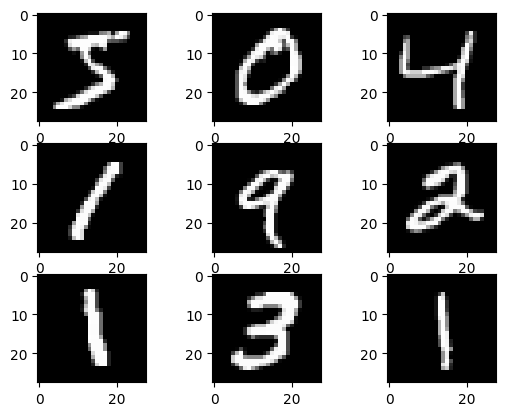

In [11]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

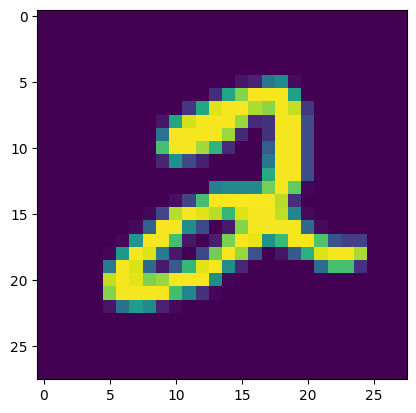

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 5ms/step - loss: 0.2807 - accuracy: 0.9176 - val_loss: 0.1458 - val_accuracy: 0.9556
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1171 - accuracy: 0.9645 - val_loss: 0.1093 - val_accuracy: 0.9652
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0787 - accuracy: 0.9755 - val_loss: 0.0946 - val_accuracy: 0.9717
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.1071 - val_accuracy: 0.9710
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.1114 - val_accuracy: 0.9693
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0916 - val_accuracy: 0.9751
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0953 - val_accuracy

In [20]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred = y_prob.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736

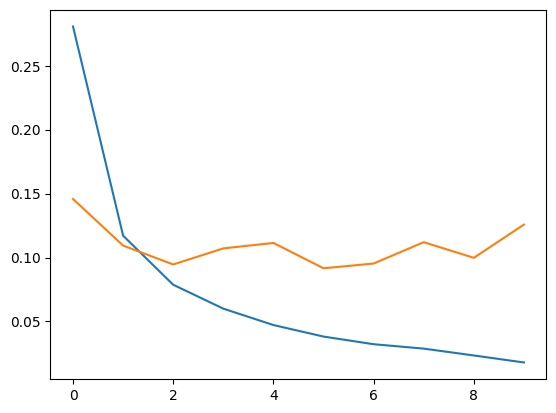

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

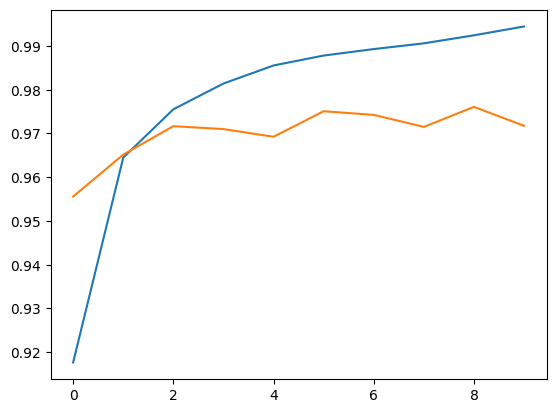

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

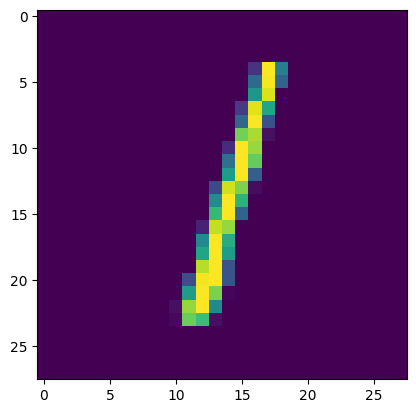

In [25]:
plt.imshow(X_test[2])

In [27]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 62ms/step


array([1])